In [45]:
"""
This code will do linear regression on generated data
"""

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# generate data
np.random.seed(24)
x = np.random.rand(100)*10
x = np.round(x, 2)
rand_scaler = 1.5
y = 1 + ( 0.6 * x) + (np.random.rand(100) * rand_scaler)
df_simp = pd.DataFrame({'X': x, 'Y': y})

In [46]:
import os
import pandas as pd

# Directory containing the CSV files
data_folder = './data'

# List to hold DataFrames for each CSV file
dataframes = []

# Iterate over all files in the directory
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# This function will find the outlying years that do not match across all dataframes
# The output can be used to later remove the outlying years from each DataFrame
def find_outlying_years(dataframes):
    """
    This function finds the outlying years that do not match across all dataframes.
    """

    df_sets = [set(dfi["Year"].unique()) for dfi in dataframes]

    years_to_remove = set() # Initialize an empty set to hold the years to remove
    for i, current_set in enumerate(df_sets):
        for refSet in df_sets[i+1:]:
            years_to_remove.update(current_set.union(refSet) - current_set.intersection(refSet))
    return years_to_remove

# Find outlying years
years_to_remove = find_outlying_years(dataframes)

# next we remove the years from each DataFrame
for df in dataframes:
    df.drop(df[df["Year"].isin(years_to_remove)].index, inplace=True)

# check the resulting data frames for the years that dont match accross all data frames
setsRemoved = find_outlying_years(dataframes) == set() # should return True
print(f"Sets removed: {setsRemoved}")

Sets removed: True


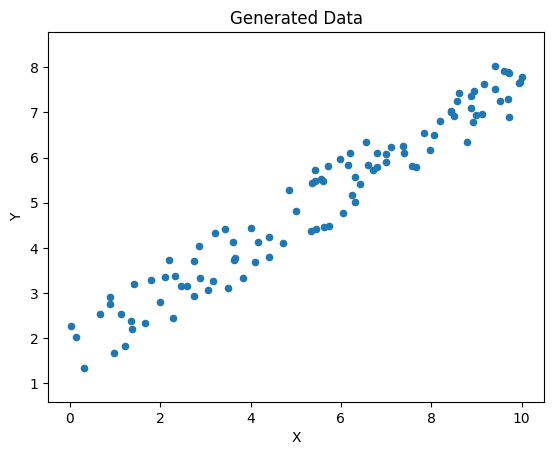

In [47]:
# This section is for plotting and visualizing the data
df_simp.plot(kind='scatter', x='X', y='Y')
plt.title('Generated Data')
plt.axis('equal')
plt.show()

# Linear regression

In [48]:
# this section will deal with the functionality of the linear regression

# Line function
def line(a, x, b):
    return (a * x) + b

# Cost function
def cost_function(a, x, b, y):
    m = len(x) # number of data points
    total_error = 0 # initialize total error
    for i in range(m):
        Yc = line(a, x[i], b) # Calculated y estimate
        total_error  += (y[i]-Yc)**2
    return total_error/(2*m)

def gradient_descent(
    a = 0,
    b = 0,
    data=pd.DataFrame([]),
    alpha = 1,
    num_iterations = 1000
):
    """
    This function will perform gradient descent to find the best fit line
    """

    # init the x and y values
    x = data['X']
    y = data['Y']

    # get the number of data points
    m = len(x)

    # perform gradient descent
    # -> This is the important bit
    for i in range(num_iterations):
        y_da = 0 # initialize slope gradient
        y_db = 0 # initialize constant gradient

        for j in range(m):
            Yc = line(a, x[j], b)
            y_da += -(1/m)*(y[j]-Yc)*x[j]
            y_db += -(1/m)*(y[j]-Yc)

        a -= alpha*y_da
        b -= alpha*y_db
        if i % 50 == 0:
            print(f'Iteration: {i} Cost: {cost_function(a, x, b, y)}')

    return (a, b)

# Testing and implementation phase

Iteration: 0 Cost: 5.523173552072995
Iteration: 50 Cost: 0.3193703088174914
Iteration: 100 Cost: 0.2756561468088341
Iteration: 150 Cost: 0.2402884265739584
Iteration: 200 Cost: 0.211673543498659
Iteration: 250 Cost: 0.1885221634273577
Iteration: 300 Cost: 0.16979112763051682
Iteration: 350 Cost: 0.15463644998529724
Iteration: 400 Cost: 0.14237528850861841
Iteration: 450 Cost: 0.13245517774963994
Iteration: 500 Cost: 0.12442913570969306
Iteration: 550 Cost: 0.11793552365312497
Iteration: 600 Cost: 0.11268175132906588
Iteration: 650 Cost: 0.10843109339129622
Iteration: 700 Cost: 0.10499202298826711
Iteration: 750 Cost: 0.10220958191440437
Iteration: 800 Cost: 0.09995839847753761
Iteration: 850 Cost: 0.09813703848036497
Iteration: 900 Cost: 0.09666343478153998
Iteration: 950 Cost: 0.0954711895007817

Y = 0.630890471174887 * X + 1.546843060819572


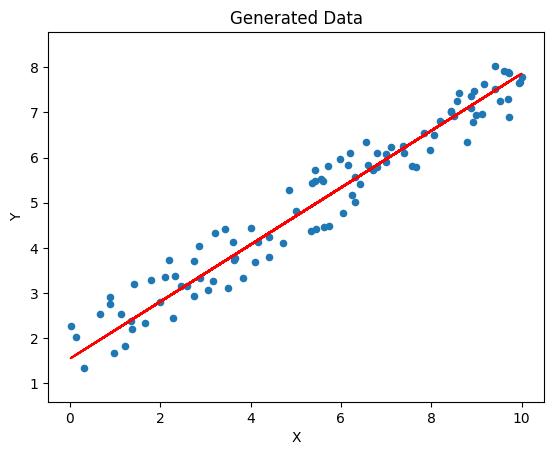

In [49]:
# run the gradient descent and write out the results as a line equation
a, b = gradient_descent(data=df_simp, alpha=0.01, num_iterations=1000)
print(f'\nY = {a} * X + {b}')

# plot the line with that data to see how well it fits
df_simp.plot(kind='scatter', x='X', y='Y')
plt.plot(df_simp['X'], line(a, df_simp['X'], b), color='red')
plt.axis('equal')
plt.title('Generated Data')
plt.show()